In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, file_name='test', col_width=1.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=np.array([20,100]))
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w', rotation='vertical')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    
    #fig.savefig(file_name + '.png', bbox_inches=None)
    return ax, size

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w', rotation='vertical')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [ ]:
df = pd.read_excel("files/novosib_filtered_optimized.xlsx", nrows=10)

dfx = df.iloc[:,1:5]#.style.apply(background_gradient)#

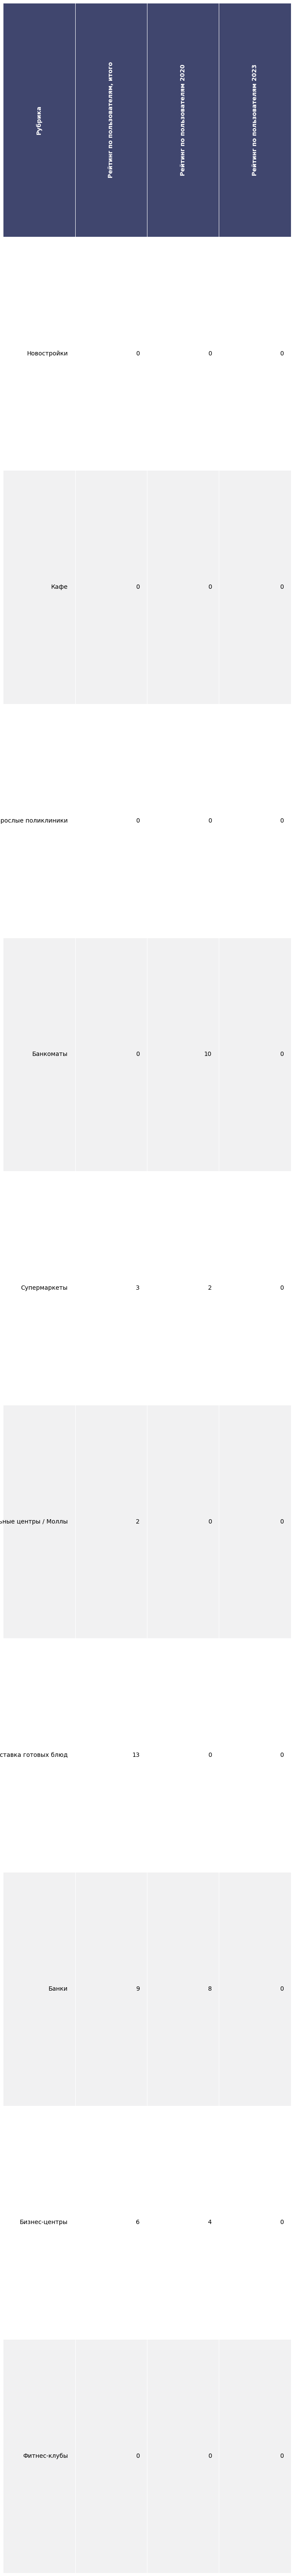

In [ ]:
ax = render_mpl_table(dfx, col_width=3, row_height=10)

In [365]:
df = pd.read_excel("files/novosib_filtered_optimized.xlsx", nrows=15)

data = df.iloc[:,1:8]#.style.apply(background_gradient)#

In [237]:
df = pd.read_excel("files/novosib_filtered_optimized.xlsx")['Рубрика']

In [406]:
data.columns

Index(['Рубрика', 'Рейтинг по пользователям, итого',
       'Рейтинг по пользователям 2020', 'Рейтинг по пользователям 2023',
       'Антирейтинг по пользователям 2023',
       'Антирейтинг по пользователям 2020',
       'Рейтинг постоянного\nроста пользователей'],
      dtype='object')

In [434]:
def render_mpl_table(data, file_name='test', col_width=1.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array([17.5, 10.33]))
        fig, ax = plt.subplots(figsize=size, dpi=2**8)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    cells_dict = dict(six.iteritems(mpl_table._cells))

    for k in sorted(cells_dict.keys()):
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            rotation='vertical' if k != (0,0) else 'horizontal'
            cell.set_text_props(weight='bold', color='w', rotation=rotation, fontfamily='arialnarrow', fontsize=font_size, wrap=True)
            cell.set_facecolor(header_color)
            cell.set_height(0.1)
        else:
            ha = 'center' if k[1] !=0 else 'left'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_height(0.007)
            cell.set_text_props(wrap=True, fontfamily='arialnarrow', ha=ha, fontsize=font_size, x=100000)
        if k[1]!=0:
            cell.set_width(0.001)
        else:
            cell.set_width(0.006)
        #ax.axhline(linewidth=1, color='r')
    fig.savefig(file_name + '.png', bbox_inches='tight')

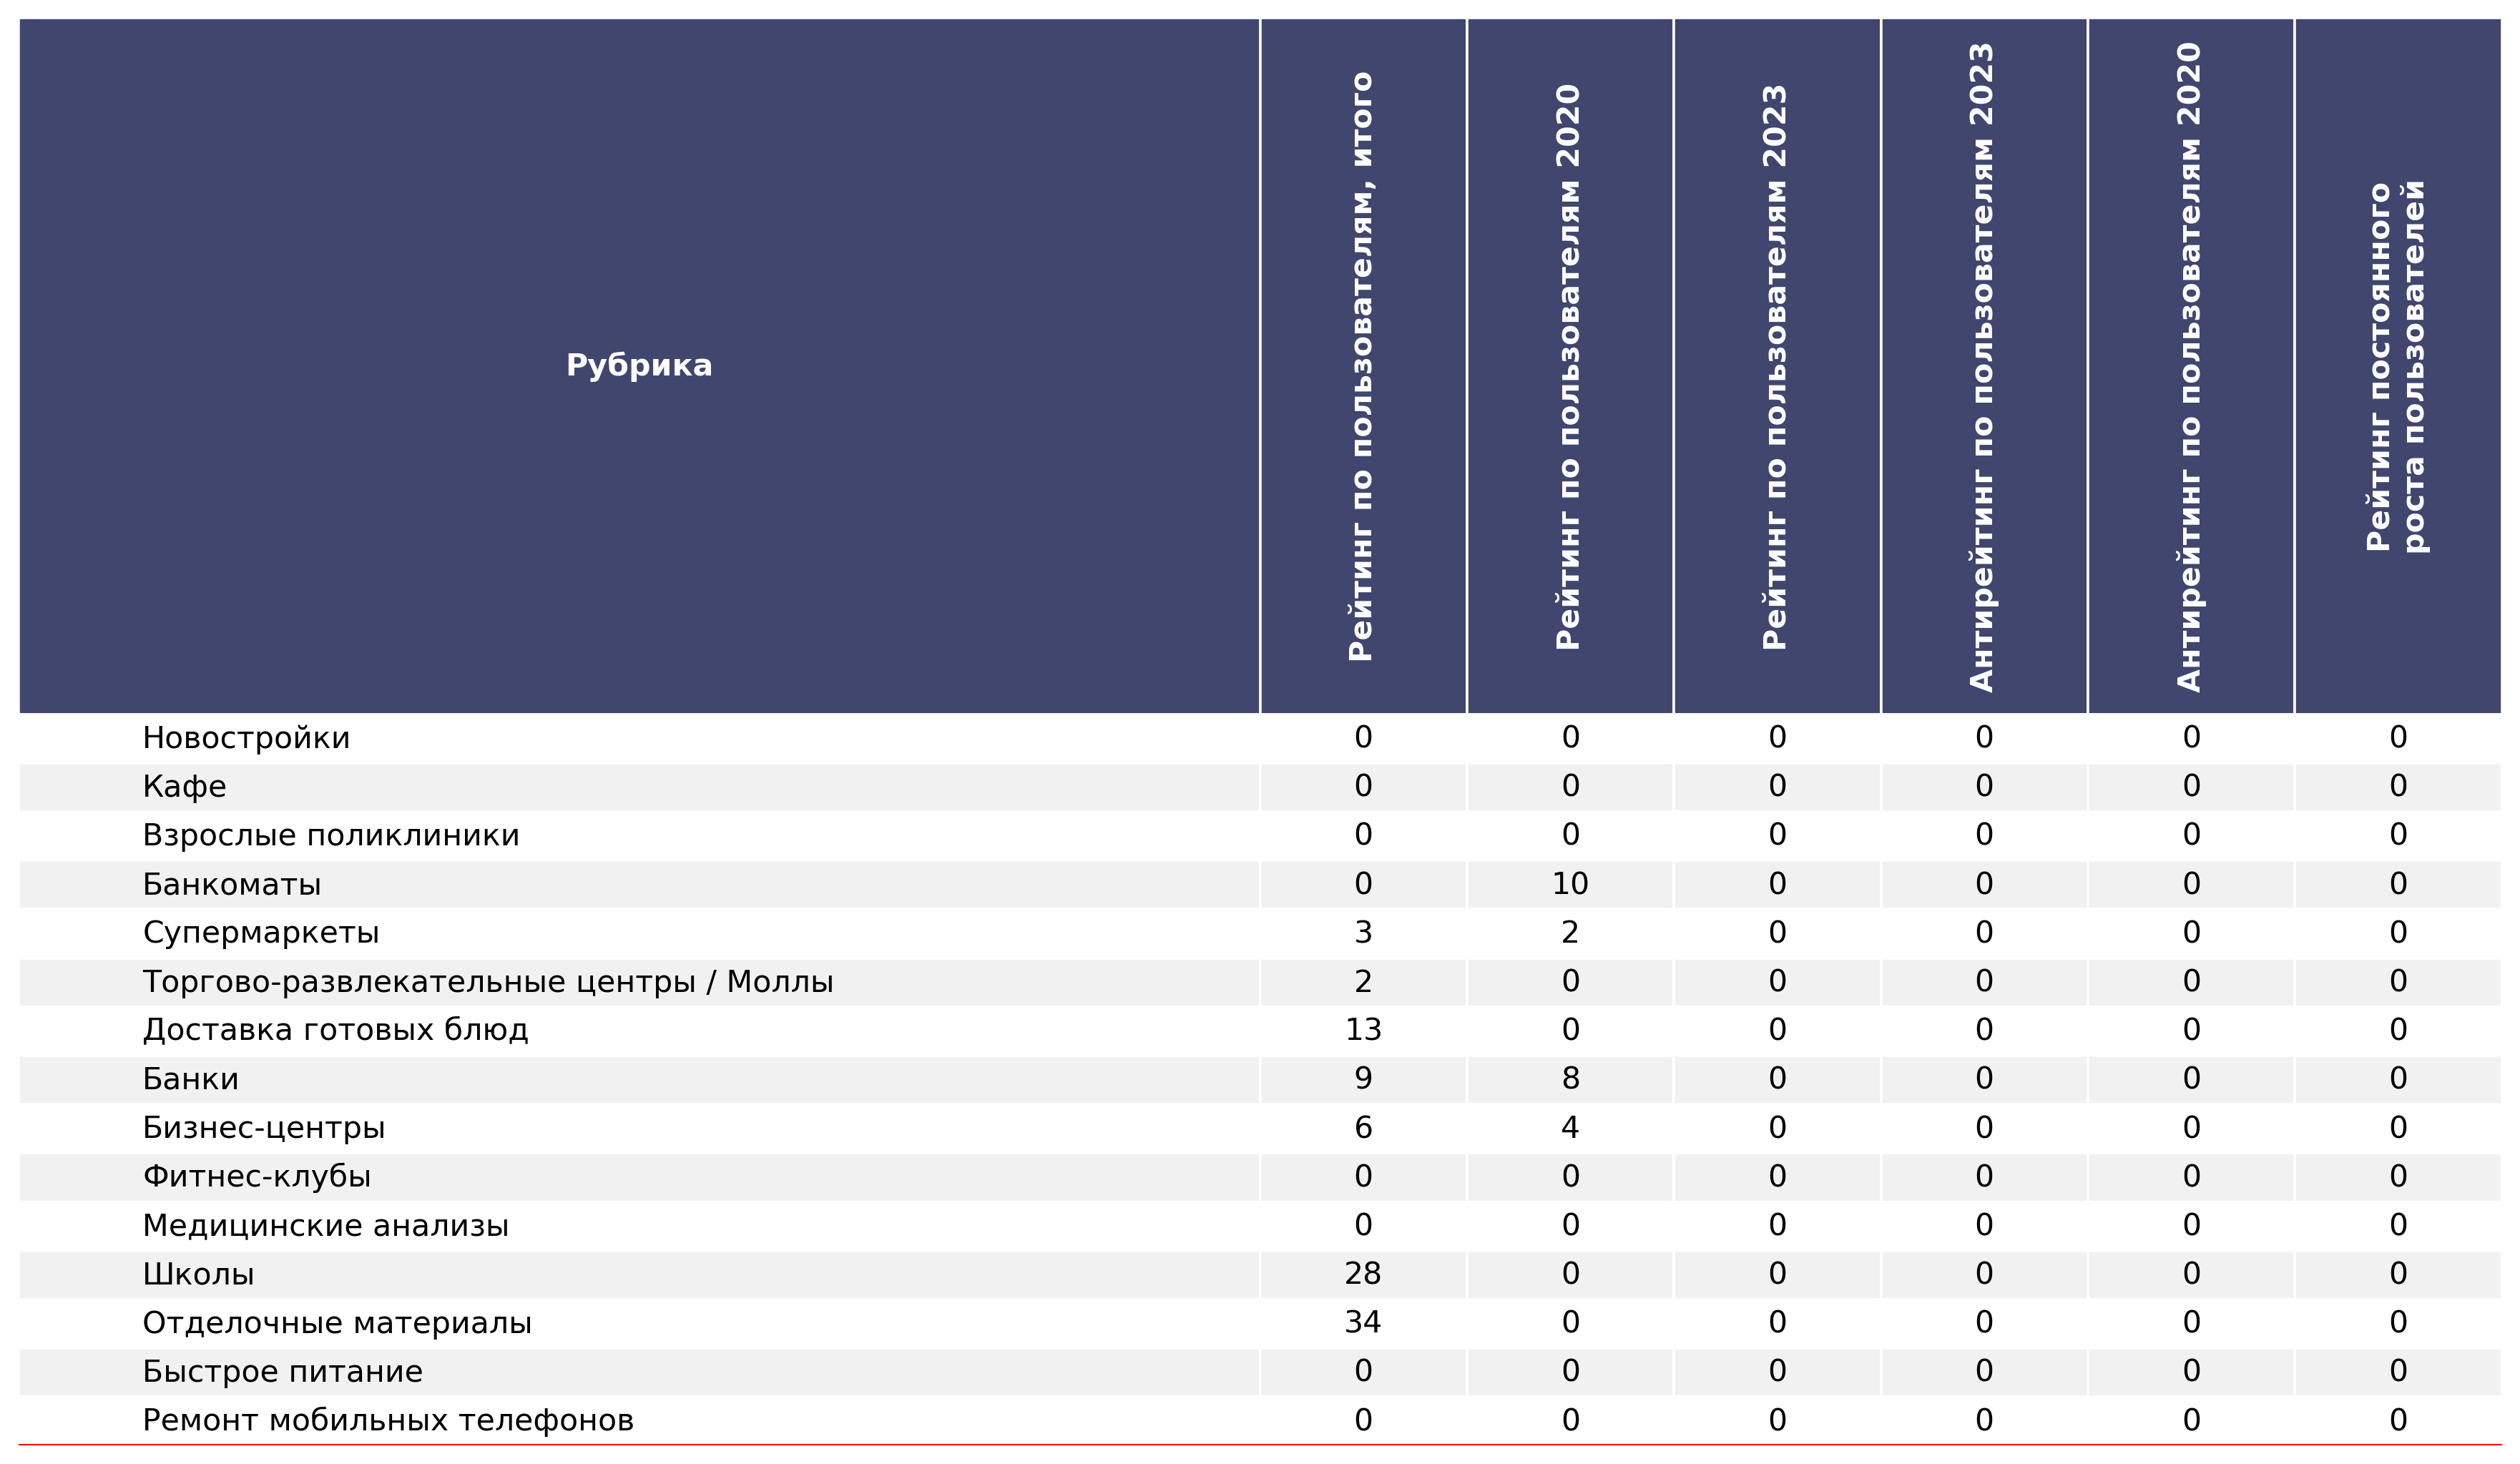

In [432]:
render_mpl_table(data, header_color='#40466e', row_colors=['#f1f1f2', 'w'])

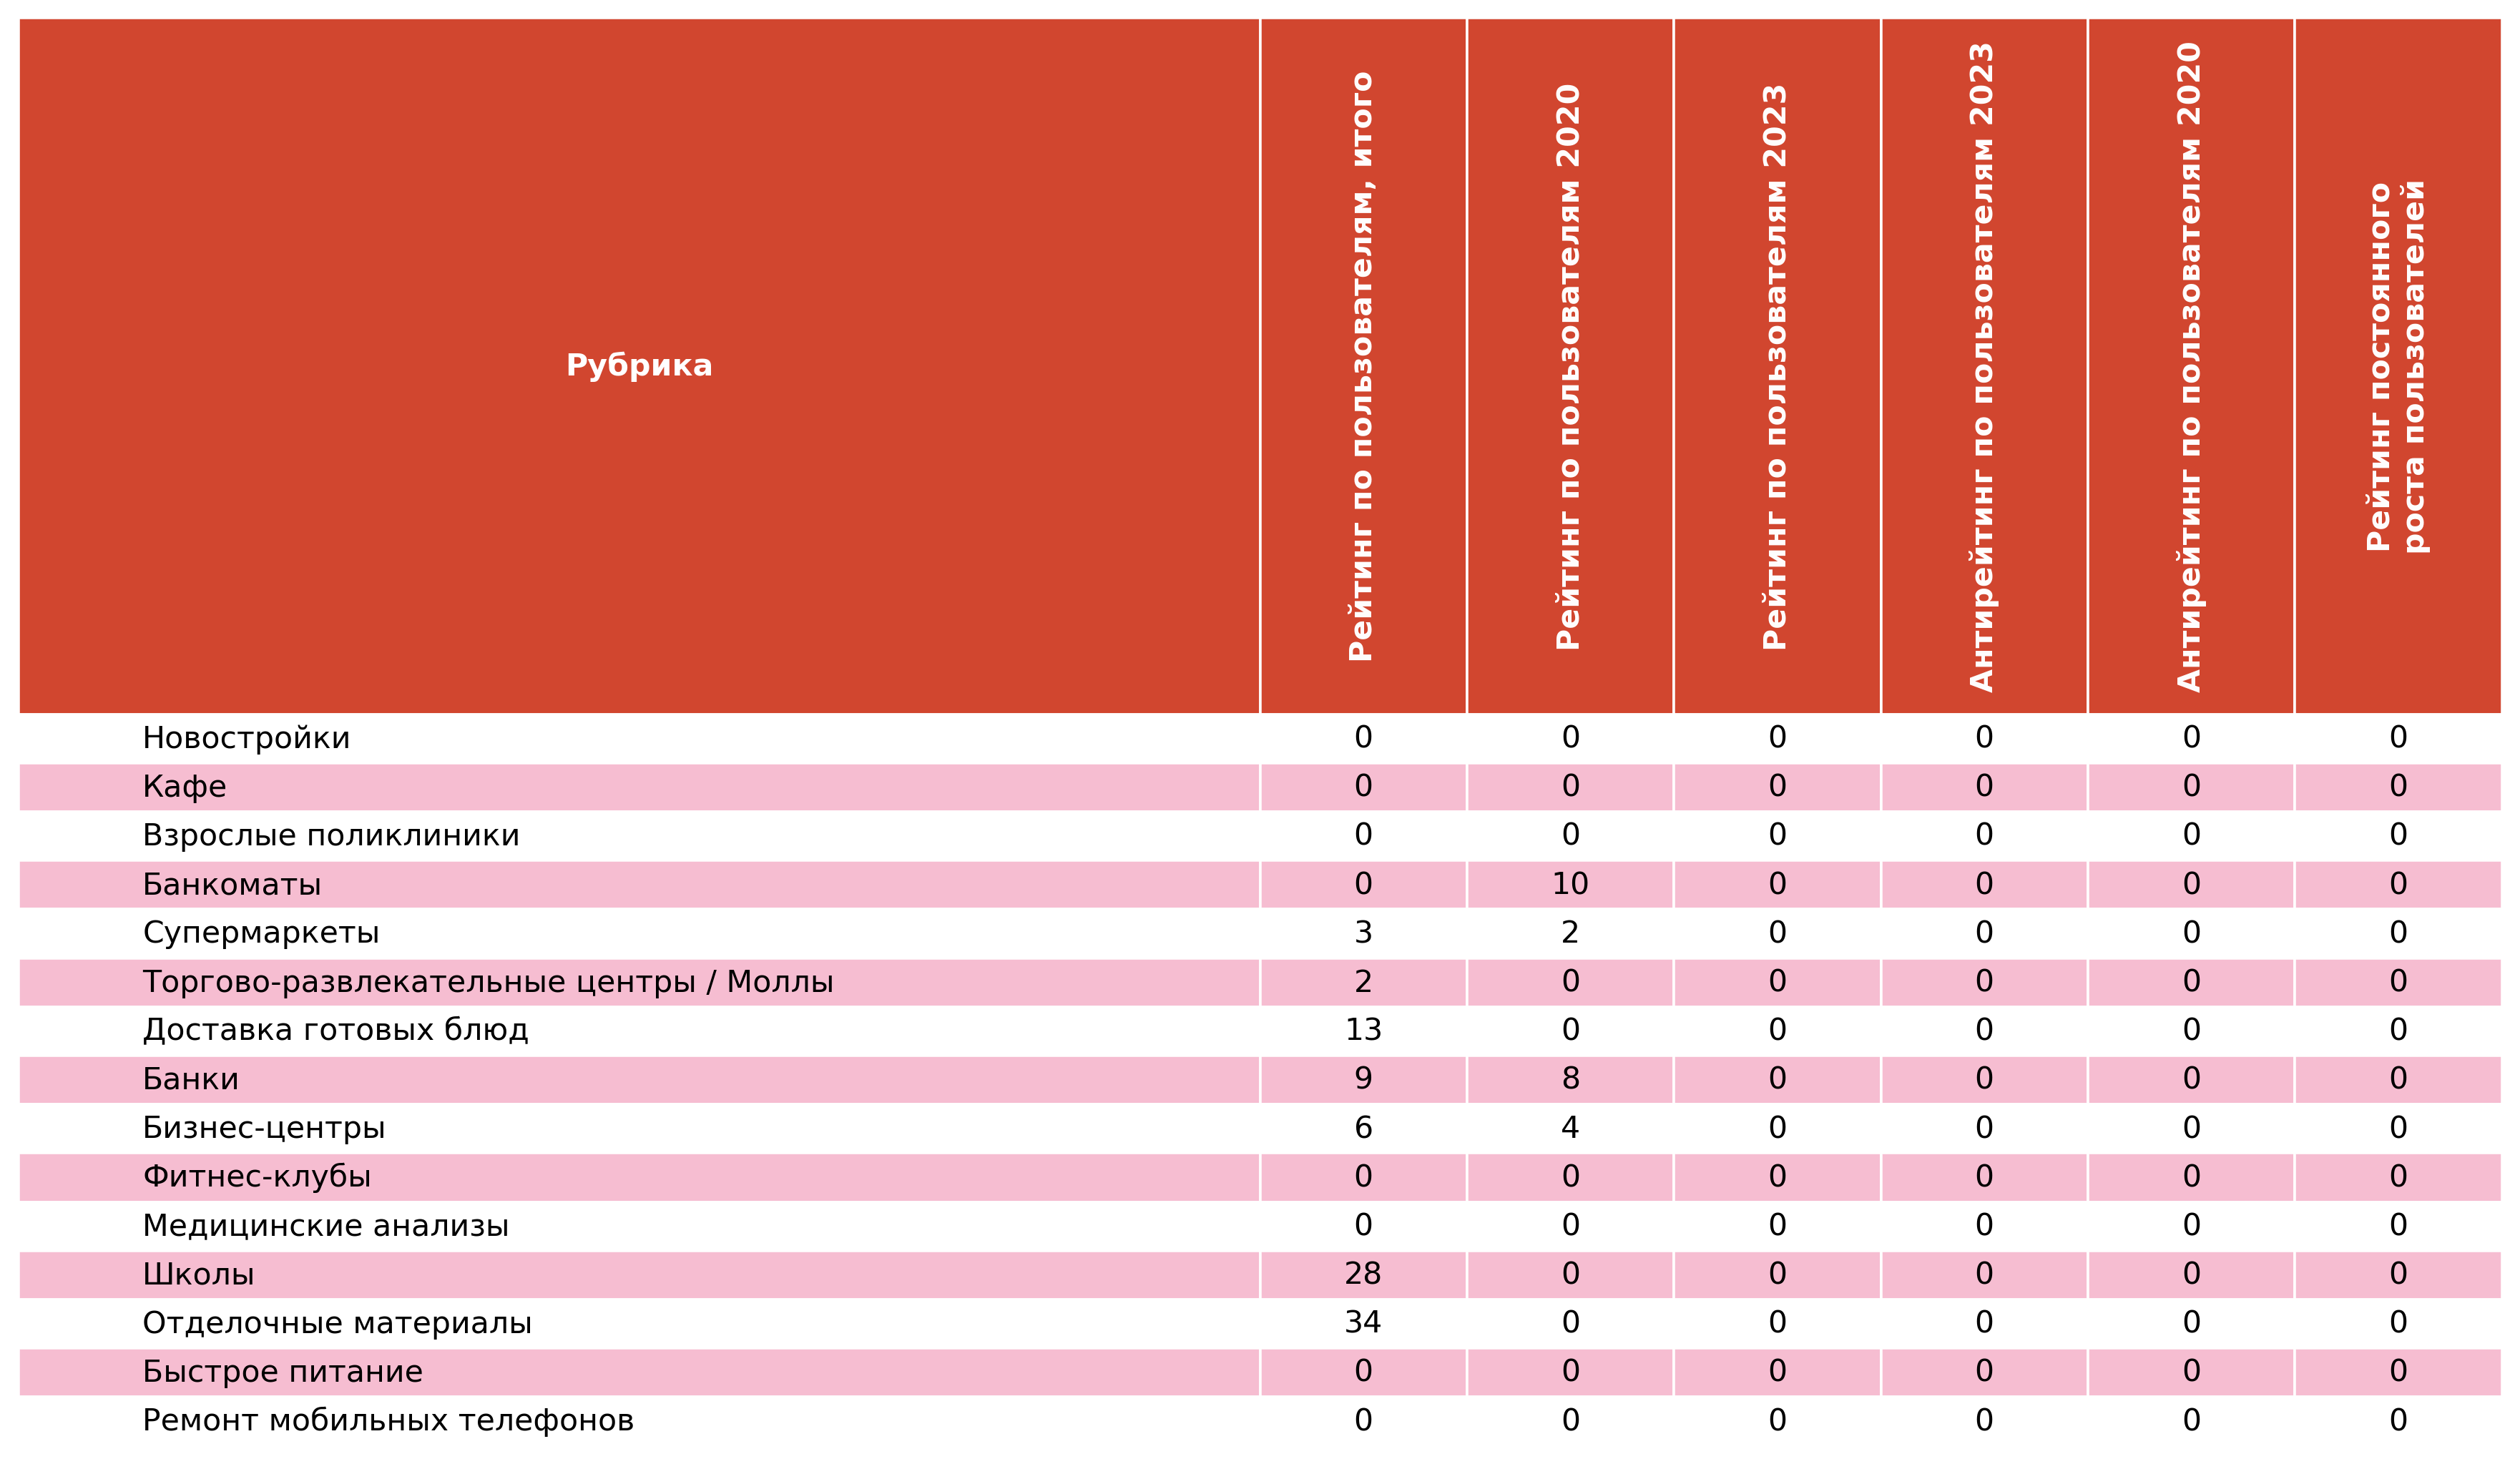

In [435]:
render_mpl_table(data, 'red_test', header_color='#d1462f', row_colors=['#F6BDD1', 'w'])

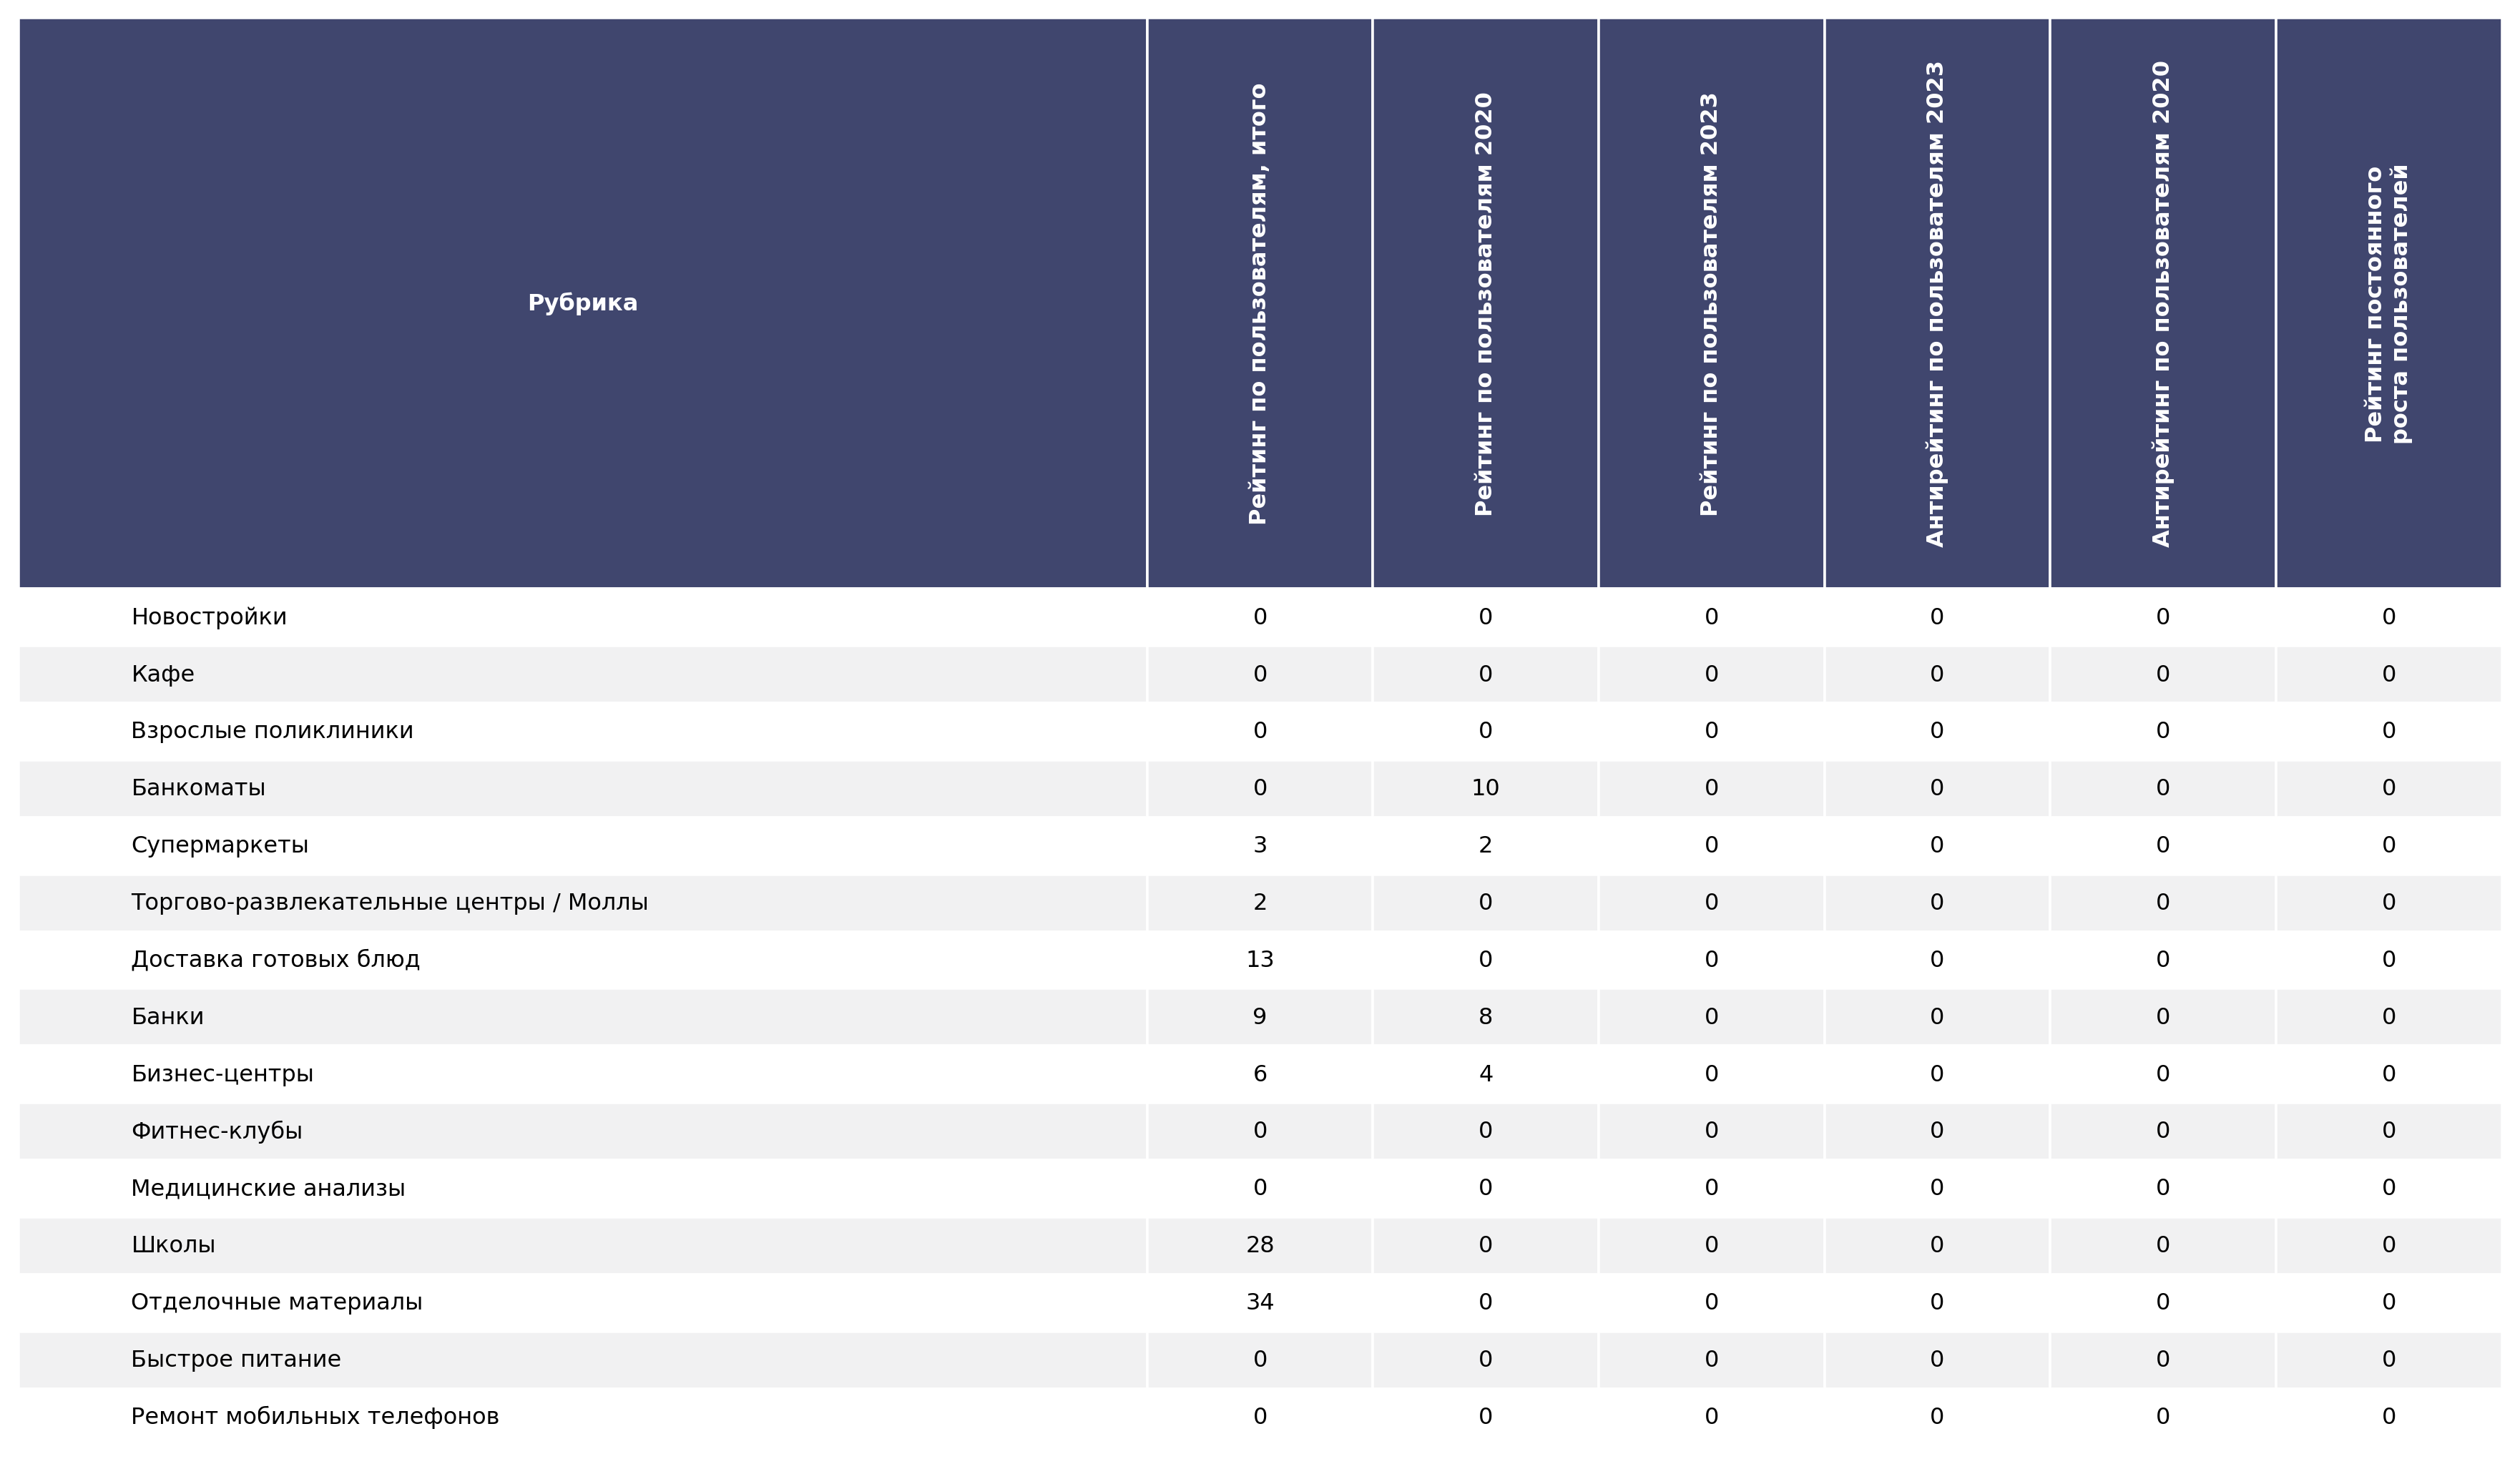

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


col_width=3.0
row_height=0.625
font_size=14
header_color='#40466e'
row_colors=['#f1f1f2', 'w']
edge_color='w'
bbox=[0, 0, 1, 1]
header_columns=0
ax=None

if ax is None:
    size = (np.array([17.5, 10.33]))
    fig, ax = plt.subplots(figsize=size, dpi=2**8)
    ax.axis('off')

mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns)

mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
cells_dict = dict(six.iteritems(mpl_table._cells))


for k in sorted(cells_dict.keys()):
    cell = cells_dict[k]
    cell.set_edgecolor(edge_color)
    if k[0] == 0 or k[1] < header_columns:
        rotation='vertical' if k != (0,0) else 'horizontal'
        cell.set_text_props(weight='bold', color='w', rotation=rotation, fontfamily='arialnarrow', fontsize=9, wrap=True)
        cell.set_facecolor(header_color)
        cell.set_height(0.1)
    else:
        ha = 'center' if k[1] !=0 else 'left'
        cell.set_facecolor(row_colors[k[0]%len(row_colors)])
        cell.set_height(0.01)
        cell.set_text_props(wrap=True, fontfamily='arialnarrow', ha=ha, fontsize=9)
    if k[1]!=0:
        cell.set_width(0.001)
    else:
        cell.set_width(0.005)